<a href="https://colab.research.google.com/github/deenaselvakumar/deena_s/blob/main/Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://images.pexels.com/photos/164634/pexels-photo-164634.jpeg" width="720"></center>

<center><font size=6> Used Car Price Prediction </font></center>

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- Brand: brand name of the car
- Model Name: model name of the car
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Installing and Importing necessary libraries

In [1]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.24.1 pandas==1.5.3 -q --user --no-warn-script-location

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
# uncomment and run the following lines in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading the dataset
data = pd.read_csv("/content/used_cars_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 14 columns.


### Checking 10 random rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2397,Kolkata,2016,21460.0,Petrol,Manual,First,5.0,9.470,6.00,17.00,1497.0,121.36,ford,ecosport
6218,Kolkata,2013,48000.0,Diesel,Manual,First,5.0,7.880,NaN,23.40,1248.0,74.00,maruti,swift
6737,Mumbai,2015,59500.0,Petrol,Manual,First,7.0,13.580,NaN,17.30,1497.0,117.30,honda,mobilio
3659,Delhi,2015,27000.0,Petrol,Automatic,First,5.0,9.600,5.95,19.00,1199.0,88.70,honda,jazz
4513,Bangalore,2015,19000.0,Diesel,Automatic,Second,5.0,69.675,38.00,16.36,2179.0,187.70,jaguar,xf
599,Coimbatore,2019,40674.0,Diesel,Automatic,First,7.0,28.050,24.82,11.36,2755.0,171.50,toyota,innova
186,Bangalore,2014,37382.0,Diesel,Automatic,First,5.0,86.970,32.00,13.00,2143.0,201.10,mercedes-benz,e-class
305,Kochi,2014,61726.0,Diesel,Automatic,First,5.0,67.100,20.77,17.68,1968.0,174.33,audi,a6
4581,Hyderabad,2013,105000.0,Diesel,Automatic,First,5.0,44.800,19.00,17.32,1968.0,150.00,audi,q3
6616,Delhi,2014,55000.0,Diesel,Automatic,First,5.0,49.490,NaN,11.78,2143.0,167.62,mercedes-benz,new


**Observations**


In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


**Observations**

- 6 columns are of the *object* type columns and 7 columns are of *numerical* type columns


### Checking for duplicate values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

2

- There are two duplicate value in the data.
- Let's take a closer look at it.

In [ ]:
df[df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


**Observations**

- There is a good chance that two cars of the same build were sold in the same location.
- But it is highly unlikely that both of them will have the same number of kilometers driven.
- So, we will drop the row which occurs second.

In [ ]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values

### Checking for missing values

In [ ]:
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,53
New_Price,0
Price,1232
mileage_num,83


* There are missing values in Kilometers_Driven, Seats, Price, mileage_num, engine_num, power_num which can be treated in data pre-processing
* We will drop the rows where `Price` is missing as it is the target variable before splitting the data into train and test

## Data Preprocessing

### Missing Value Treatment

- Let's drop the rows having NaN in the `Price` column, which is our target column.

In [ ]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,42
New_Price,0
Price,0
mileage_num,70


### Encoding the categorical variables

In [ ]:
df.dtypes

,0
Location,object
Year,int64
Kilometers_Driven,float64
Fuel_Type,object
Transmission,object
Owner_Type,object
Seats,float64
New_Price,float64
Price,float64
mileage_num,float64


In [ ]:
data_car = df[['Brand', 'Model']].copy()

In [ ]:
df = pd.get_dummies(df,
    columns=df.select_dtypes(include=["object","int64"]).columns.tolist(),
    drop_first=True,dtype=int
)

In [ ]:
# Adding Brand and Model which is stored in data_car variable
# These will be needed during missing value imputation
df_final = pd.concat([df,data_car], axis=1)

In [ ]:
df_final.shape

(6018, 287)

In [ ]:
df_final.head()

,Kilometers_Driven,Seats,New_Price,Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
0,72000.0,5.0,5.51,1.75,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Train Test Split

In [ ]:
# defining the dependent and independent variables
X = df_final.drop(["Price"], axis=1)
y = df_final["Price"]

In [ ]:
# splitting the data in 80:20 ratio for train and temporary data
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
# splitting the temporary data in 50:50 ratio for validation and test data
# splitting the temporary data in 50:50 ratio for validation and test data
from sklearn.model_selection import train_test_split # Make sure to import train_test_split
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0]) # Use x_train.shape[0] to get the number of rows in the training data
print("Number of rows in validation data =", x_val.shape[0]) # Use x_val.shape[0] to get the number of rows in the validation data
print("Number of rows in test data =", x_test.shape[0]) # Use x_test.shape[0] to get the number of rows in the testing data

Number of rows in train data = 4814
Number of rows in validation data = 602
Number of rows in test data = 602


### Missing Value Treatment

In [ ]:
def print_missing_values_columns(df):
    """
    Filters and prints only the columns from the DataFrame df that contain missing values.

    Parameters:
    - df: DataFrame
        The DataFrame to check for missing values.
    """
    missing_values_columns = df.columns[df.isnull().any()]
    missing_values_counts = df[missing_values_columns].isnull().sum()
    print(missing_values_counts)

In [ ]:
# train data
print_missing_values_columns(x_train)

Kilometers_Driven      1
Seats                 39
mileage_num           59
engine_num            34
power_num            116
dtype: int64


In [ ]:
# validation data
print_missing_values_columns(x_val)

Seats           1
mileage_num     5
power_num      13
dtype: int64


In [ ]:
# test data
print_missing_values_columns(x_test)

Seats           2
mileage_num     6
engine_num      2
power_num      14
dtype: int64


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand` and `Model`.**

In [ ]:
# first, we calculate the median of Seats in the train set grouped by Brand and Model and store in train_grouped_median
train_grouped_median = x_train.groupby(["Brand", "Model"])["Seats"].median()
train_grouped_median

Brand       Model  
ambassador  classic    5.0
audi        a3         5.0
            a4         5.0
            a6         5.0
            a7         5.0
                      ... 
volvo       s60        5.0
            s80        5.0
            v40        5.0
            xc60       5.0
            xc90       7.0
Name: Seats, Length: 209, dtype: float64

**Working of the above code**

- It groups the training dataset `x_train` by the columns `Brand` and `Model`
- Within each group, it selects the `Seats` column
- Then, it calculates the median of the `Seats` column for each group
- This step effectively creates a mapping of the median number of seats for each unique combination of `Brand` and `Model`

In [ ]:
# we will use the calculated median (train_grouped_median) to fill missing values in Seats for corresponding groups in the train set
x_train["Seats"] = x_train.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

**Working of the above code**

For each row in the training dataset `x_train`:

- It checks if the value in the selected row of the `Seats` column (`row["Seats"]`) is not NaN (`pd.isna(row["Seats"])`)

- If the value is not NaN (i.e., it's not missing), it keeps the original value (`row["Seats"]`)

- If the value is NaN (missing), it uses `train_grouped_median.get((row["Brand"], row["Model"]), np.nan)` to fetch the median value for the corresponding `Brand` and `Model` combination from the train_grouped_median mapping created previously
    - If there's no corresponding median value (i.e., the combination of `Brand` and `Model` doesn't exist in `train_grouped_median`), it assigns NaN (`np.nan`).

This step essentially fills missing values in the `Seats` column of the validation dataset `x_train` using the median values calculated from the training dataset. It ensures that the imputation is done based on the specific `Brand` and `Model` combination, preserving the relationship between these features and the `Seats` column.

In [ ]:
# checking data points where Seats is still missing
x_train[x_train["Seats"].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
2369,56000.0,NaN,7.88,19.5,1061.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

* Maruti Estilo can accommodate 5 people.

In [ ]:
x_train["Seats"] = x_train["Seats"].fillna(5.0)

In [ ]:
# we will use the calculated median (train_grouped_median) to fill missing values in Seats for corresponding groups in the validation set
x_val["Seats"] = x_val.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

- The above code does the same operation as the one previously used for imputing missing values
- The only difference is that it operates on the validation set (`x_val`) instead of the training set (`x_train`)

In [ ]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

Seats           1
mileage_num     5
power_num      13
dtype: int64


In [ ]:
# checking data points where Seats is still missing
x_val[x_val["Seats"].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
3882,40000.0,NaN,7.88,19.5,1061.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

* Maruti Estilo can accommodate 5 people.

In [ ]:
x_val["Seats"] = x_val["Seats"].fillna(5.0)

In [ ]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

mileage_num     5
power_num      13
dtype: int64


In [ ]:
# Same method is applied on test data
x_test["Seats"] = x_test.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

In [ ]:
# checking the missing values in x_test
print_missing_values_columns(x_test)

mileage_num     6
engine_num      2
power_num      14
dtype: int64


**We will use a similar method to fill missing values for the `Kilometers_Driven`, `mileage_num`, `engine_num`, and `power_num` columns.**

In [ ]:
cols_list = ["Kilometers_Driven","mileage_num", "engine_num", "power_num"]

# Step 1: Calculate the median of specified columns in x_train grouped by Brand and Model
train_grouped_median = x_train.groupby(["Brand", "Model"])[cols_list].median()

# Step 2: Use the calculated median to fill missing values in specified columns for corresponding groups in train, validation and test data
for col in cols_list:
    x_train[col] = x_train.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)
    x_val[col] = x_val.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)
    x_test[col] = x_test.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)

In [ ]:
# checking the missing values in x_train
print_missing_values_columns(x_train)

mileage_num    7
power_num      9
dtype: int64


In [ ]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

mileage_num    1
power_num      1
dtype: int64


In [ ]:
# checking the missing values in x_test
print_missing_values_columns(x_test)

mileage_num    1
power_num      1
dtype: int64


* There are still some missing values in `mileage_num` and `power_num`.
* We'll impute these missing values by taking the median grouped by the `Brand`.

In [ ]:
cols_list = ["mileage_num", "power_num"]

# Step 1: Calculate the median of specified columns in x_train grouped by Brand and Model
train_grouped_median = x_train.groupby(["Brand"])[cols_list].median()

# Step 2: Use the calculated median to fill missing values in specified columns for corresponding groups in train, validation and test data
for col in cols_list:
    x_train[col] = x_train.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)
    x_val[col] = x_val.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)
    x_test[col] = x_test.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)

In [ ]:
print_missing_values_columns(x_train)

mileage_num    1
power_num      1
dtype: int64


In [ ]:
print_missing_values_columns(x_val)

Series([], dtype: float64)


In [ ]:
print_missing_values_columns(x_test)

Series([], dtype: float64)


* There are still some missing values in train data (`mileage_num` and `power_num`) and all missing values in val and test data are imputed.
* We'll impute train missing values using the column median across the entire data.

In [ ]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    x_train[col] = x_train[col].fillna(df[col].median())

In [ ]:
print_missing_values_columns(x_train)

Series([], dtype: float64)


- Missing values in all columns of x_train are imputed.

In [ ]:
# Dropping Brand and Model from train, validation, and test data as we already have dummy variables for them
x_train = x_train.drop(['Brand','Model'],axis=1)
x_val = x_val.drop(['Brand','Model'],axis=1)
x_test = x_test.drop(['Brand','Model'],axis=1)

### Normalizing the numerical variables

In [ ]:
# Define the columns to scale
num_columns = ["Kilometers_Driven", "Seats", "New_Price", "mileage_num", "engine_num", "power_num"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(x_train[num_columns])

StandardScaler()

* Once the scaler object fits on the data using the `fit()` method, it stores the parameters (mean and standard deviation) for normalization based on the training data

* We then use these parameters to normalize the validation and test data

* This is similar to what we did in the Missing Value Treatment section.
    - The only difference is that there we had to explicitly store the parameters (median values), while here it is done implicitly by sklearn in this case

In [ ]:
# Transform selected columns in x_train, x_val, and x_test using the fitted scaler

x_train[num_columns] = scaler.transform(x_train[num_columns])

In [ ]:
x_train.head()

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
4269,-0.694078,-0.351313,-0.637638,1.136662,-1.034356,-0.841807,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# Transform selected columns in x_val using the fitted scaler
x_val[num_columns] = scaler.transform(x_val[num_columns])

# Transform selected columns in x_test using the fitted scaler
x_test[num_columns] = scaler.transform(x_test[num_columns])

### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a neural network model
def model_performance(model,predictors,target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors).reshape(-1)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf =  {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "Adj. R-squared": [adjr2],
            "MAPE": [mape]}

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)

## Model building

We'll use $R^2$ as our metric of choice for the model to optimize.

In [ ]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.R2Score(name="r2_score")]

### Model 0

- We will start off with a simple neural network with
  - No Hidden layers
  - Gradient descent as the optimization algorithm.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 10
batch_size = x_train.shape[0]

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 215.6193 - r2_score: -0.7024 - val_loss: 231.8262 - val_r2_score: -0.6387
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 199.6886 - r2_score: -0.5766 - val_loss: 215.1222 - val_r2_score: -0.5207
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 185.3213 - r2_score: -0.4632 - val_loss: 200.0059 - val_r2_score: -0.4138
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 172.3545 - r2_score: -0.3608 - val_loss: 186.3157 - val_r2_score: -0.3170
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 160.6429 - r2_score: -0.2683 - val_loss: 173.9070 - val_r2_score: -0.2293
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 150.0572 - r2_score: -0.1848 - val_loss: 162.6511 - val_r2_score: -0.1498
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 140.4819 - r2_score: -0.1092 - val_loss: 152.4325 - val_r2_score: -0.0775
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 131.8141 - r2_score: -0.04

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.390315055847168


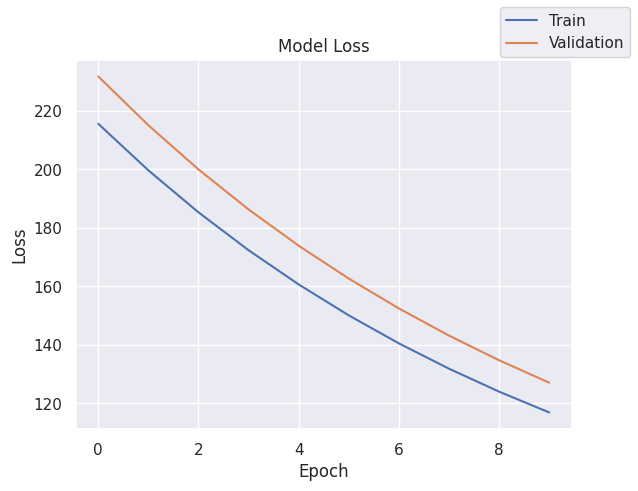

In [ ]:
plot(history,'loss')

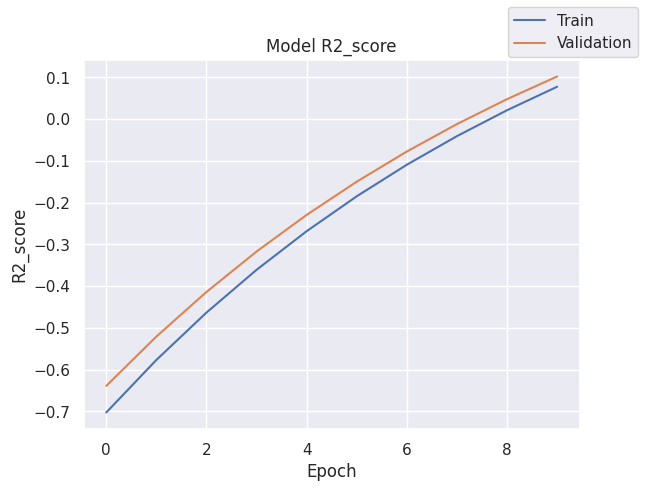

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[0]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093


- Since it's a very simple neural network, the scores aren't good.

### Model 1

- Let's try increasing the epochs to check whether the performance is improving or not.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = x_train.shape[0]

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 212.9668 - r2_score: -0.5842 - val_loss: 229.4064 - val_r2_score: -0.6216
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 197.4542 - r2_score: -0.5590 - val_loss: 213.0991 - val_r2_score: -0.5064
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 183.4492 - r2_score: -0.4484 - val_loss: 198.3264 - val_r2_score: -0.4019
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 170.7959 - r2_score: -0.3485 - val_loss: 184.9332 - val_r2_score: -0.3073
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 159.3555 - r2_score: -0.2582 - val_loss: 172.7811 - val_r2_score: -0.2214
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 149.0038 - r2_score: -0.1764 - val_loss: 161.7463 - val_r2_score: -0.1434
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 139.6302 - r2_score: -0.1024 - val_loss: 151.7180 - val_r2_score: -0.0725
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 131.1358 - r2_score

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.7447197437286377


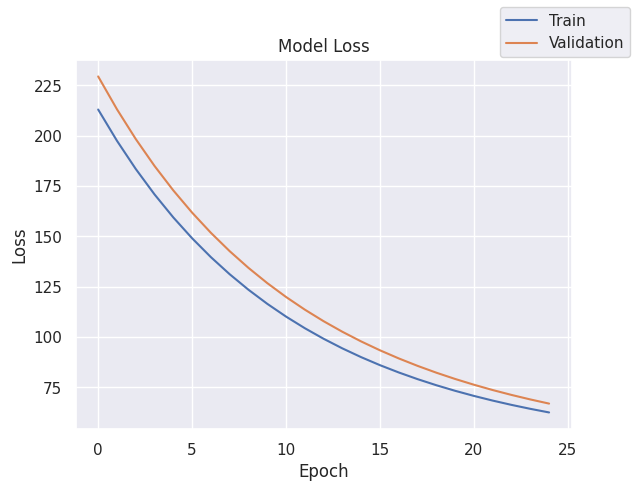

In [ ]:
plot(history,'loss')

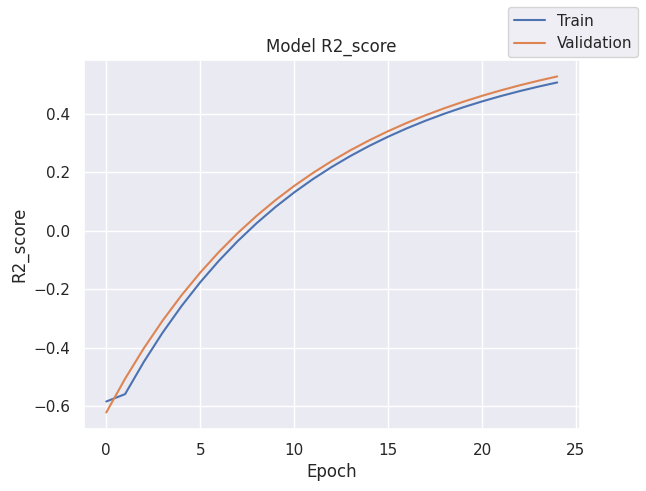

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[1]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331


- As expected, we see an increase in the $R^2$, which is great.

### Model 2

- Even though the performance of the previous model was good, the improvement in scores from one epoch to another is very slight since the updates happen only once.
- Let's now incorporate SGD to improve learning.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 32

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 86.8465 - r2_score: 0.4432 - val_loss: 35.5213 - val_r2_score: 0.7489
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 33.6671 - r2_score: 0.7365 - val_loss: 32.9409 - val_r2_score: 0.7671
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 31.4131 - r2_score: 0.7541 - val_loss: 31.3458 - val_r2_score: 0.7784
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 30.0467 - r2_score: 0.7648 - val_loss: 30.2675 - val_r2_score: 0.7860
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 29.1110 - r2_score: 0.7721 - val_loss: 29.4811 - val_r2_score: 0.7916
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 28.4153 - r2_score: 0.7775 - val_loss: 28.8686 - val_r2_score: 0.7959
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 27.8644 - r2_score: 0.7818 - val_loss: 28.3658 - val_r2_score: 0.7995
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 27.4077 - r2_score: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  116.22341012954712


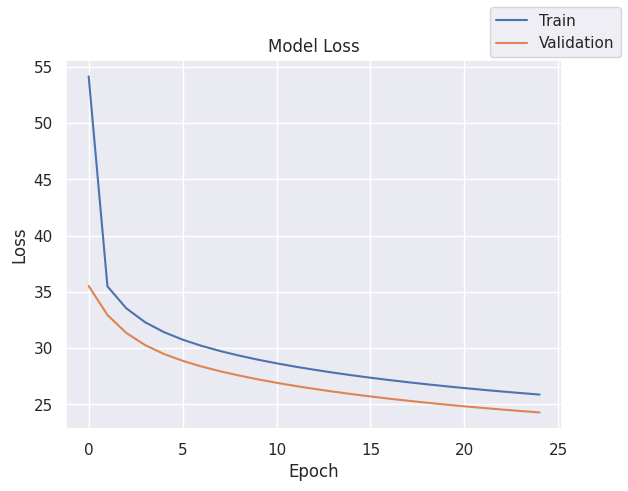

In [ ]:
plot(history,'loss')

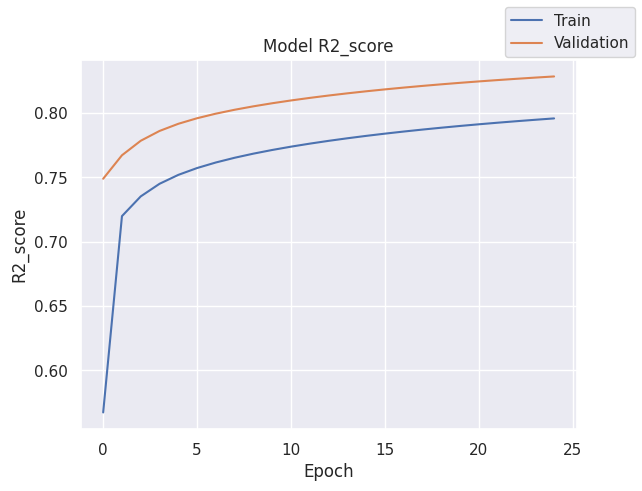

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[2]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393


- After the first epoch, we see an $R^2$ of 0.72, which is great.
- Also, the improvement in the $R^2$ after each epoch has also increased.
- Note that the time taken to train the model has also increased as model parameters are being updated more often.

### Model 3

- Let's now increase the batch size to 64 to see if the performance improves.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │             285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=epochs)
end = time.time()

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 87.1458 - r2_score: 0.5283 - val_loss: 35.6425 - val_r2_score: 0.7480
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 33.7502 - r2_score: 0.7359 - val_loss: 33.0768 - val_r2_score: 0.7662
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 31.4795 - r2_score: 0.7536 - val_loss: 31.4865 - val_r2_score: 0.7774
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 30.1022 - r2_score: 0.7643 - val_loss: 30.4104 - val_r2_score: 0.7850
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 29.1603 - r2_score: 0.7717 - val_loss: 29.6241 - val_r2_score: 0.7906
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 28.4608 - r2_score: 0.7771 - val_loss: 29.0101 - val_r2_score: 0.7949
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 27.9075 - r2_score: 0.7815 - val_loss: 28.5045 - val_r2_score: 0.7985
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 27.4490 - r2_score: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  123.68788146972656


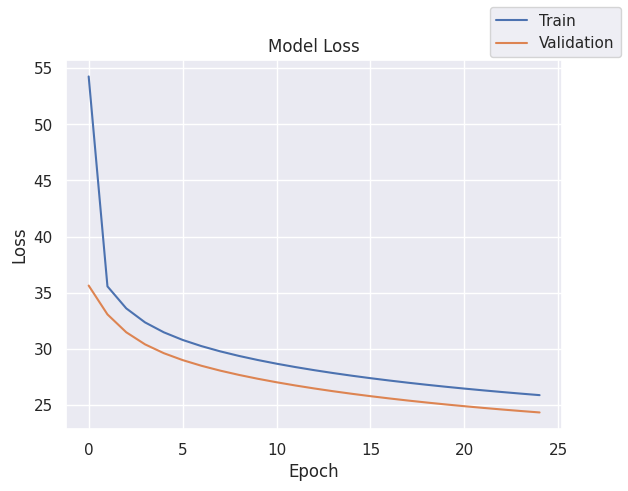

In [ ]:
plot(history,'loss')

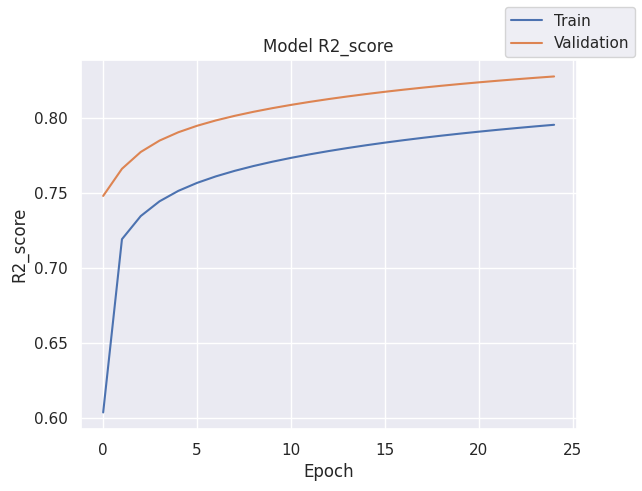

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[3]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877


- The performance hasn't improved, but the time taken to train the model has reduced.
- There's always a tradeoff here - performance vs computation time.

### Model 4

- Let's now add a hidden layer with 128 neurons.
- We'll use sigmoid as the activation function.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
#Initializing the neural network
model = Sequential()
model.add(Dense(128, activation="sigmoid", input_dim=10))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()
loss_function = 'mean_squared_error'    # defining SGD as the optimizer to be used
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'], run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
#Initializing the neural network
model = Sequential()
# The input_dim should match the number of features in x_train, which is 284
model.add(Dense(128, activation="sigmoid", input_dim=284)) # Change input_dim to 284
model.add(Dense(1))

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  -279.1781270503998


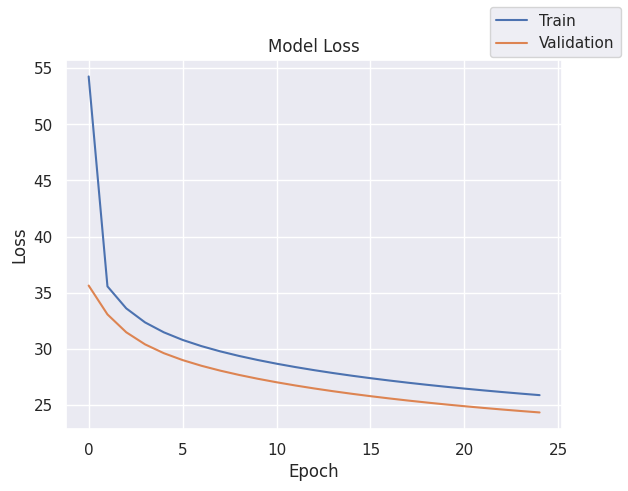

In [ ]:
plot(history,'loss')

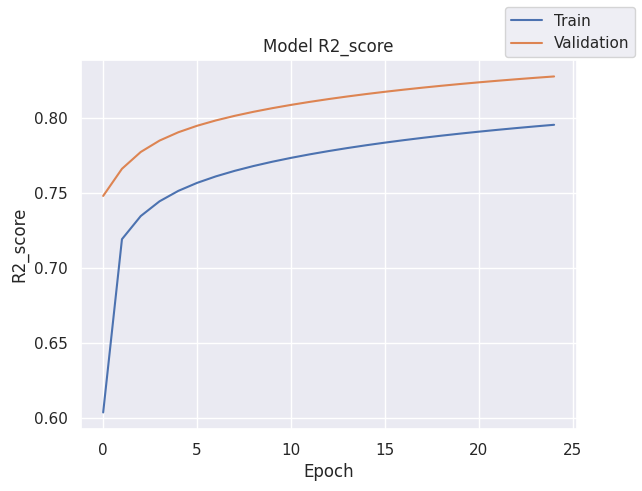

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[4]=[1,128,'sigmoid',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877
4,1,128,sigmoid,25,64,SGD,-279.178127,25.890554,24.349398,0.795585,0.827877


- We see an improvement in the model performance.
- The time taken too has not increased drastically.


### Model 5

- We'll now change the activation for the hidden layer from sigmoid to tanh.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
#Initializing the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          36,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 78.1409 - r2_score: 0.5859 - val_loss: 22.6298 - val_r2_score: 0.8400
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 24.4104 - r2_score: 0.8088 - val_loss: 20.3330 - val_r2_score: 0.8563
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 20.8962 - r2_score: 0.8361 - val_loss: 20.2712 - val_r2_score: 0.8567
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 18.9292 - r2_score: 0.8516 - val_loss: 19.0919 - val_r2_score: 0.8650
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 17.5839 - r2_score: 0.8622 - val_loss: 18.7435 - val_r2_score: 0.8675
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 16.6700 - r2_score: 0.8696 - val_loss: 18.1998 - val_r2_score: 0.8713
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 15.9100 - r2_score: 0.8757 - val_loss: 18.0499 - val_r2_score: 0.8724
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 15.2037 - r2_score: 0.8814 - val_loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  63.482324838638306


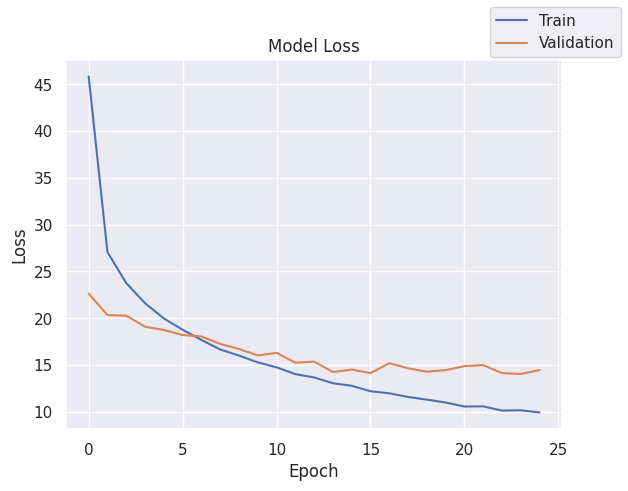

In [ ]:
plot(history,'loss')

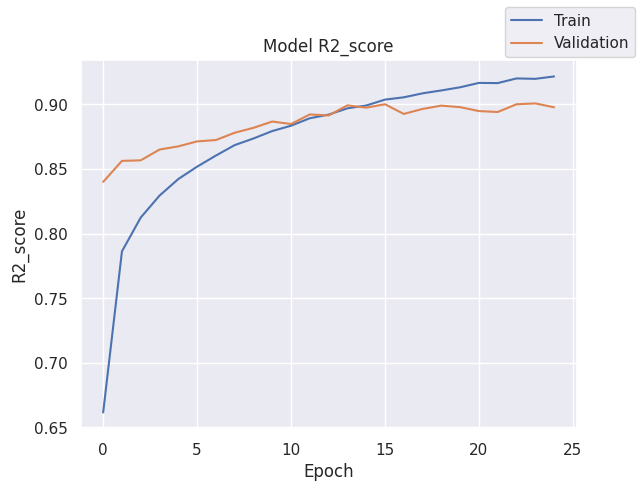

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[5]=[1,128,'tanh',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877
4,1,128,sigmoid,25,64,SGD,-279.178127,25.890554,24.349398,0.795585,0.827877
5,1,128,tanh,25,64,SGD,63.482325,9.929649,14.464983,0.921602,0.897749


- Changing the activation has improved the $R^2$.

### Model 6

- We'll now change the activation for the hidden layer from tanh to relu

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
#Initializing the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          36,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 78.5813 - r2_score: 0.6038 - val_loss: 21.9846 - val_r2_score: 0.8446
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 24.0171 - r2_score: 0.8118 - val_loss: 20.1914 - val_r2_score: 0.8573
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 20.7556 - r2_score: 0.8371 - val_loss: 20.1364 - val_r2_score: 0.8577
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 18.7839 - r2_score: 0.8527 - val_loss: 20.0669 - val_r2_score: 0.8581
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 17.4917 - r2_score: 0.8630 - val_loss: 19.7885 - val_r2_score: 0.8601
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 16.6003 - r2_score: 0.8702 - val_loss: 19.4247 - val_r2_score: 0.8627
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 15.8299 - r2_score: 0.8764 - val_loss: 19.2349 - val_r2_score: 0.8640
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 15.2527 - r2_score: 0.8811 - val_loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  59.80771470069885


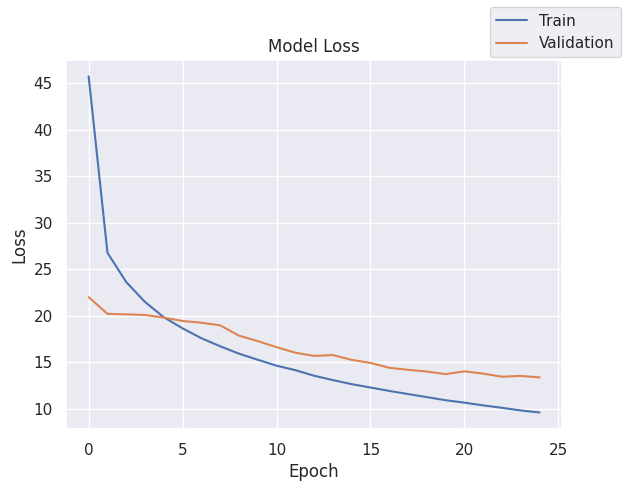

In [ ]:
plot(history,'loss')

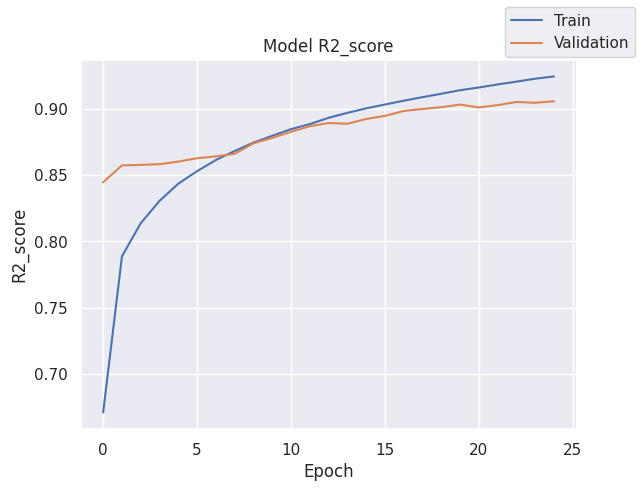

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[6]=[1,128,'relu',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877
4,1,128,sigmoid,25,64,SGD,-279.178127,25.890554,24.349398,0.795585,0.827877
5,1,128,tanh,25,64,SGD,63.482325,9.929649,14.464983,0.921602,0.897749
6,1,128,relu,25,64,SGD,59.807715,9.586002,13.353361,0.924315,0.905607


- Changing the activation has improved (slightly) the train $R^2$ but not validation $R^2$.

### Model 7

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
# This line was causing the error - it was likely a placeholder for more code.
# Remove it or replace it with the desired layer/operation.
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │          36,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 78.9293 - r2_score: 0.6044 - val_loss: 22.5572 - val_r2_score: 0.8405
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 24.1295 - r2_score: 0.8110 - val_loss: 20.3228 - val_r2_score: 0.8563
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 20.7745 - r2_score: 0.8370 - val_loss: 19.9067 - val_r2_score: 0.8593
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 18.8243 - r2_score: 0.8524 - val_loss: 19.4471 - val_r2_score: 0.8625
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 17.5857 - r2_score: 0.8623 - val_loss: 18.6458 - val_r2_score: 0.8682
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 16.5880 - r2_score: 0.8702 - val_loss: 18.1912 - val_r2_score: 0.8714
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 15.7657 - r2_score: 0.8769 - val_loss: 17.8421 - val_r2_score: 0.8739
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 15.0834 - r2_score: 0.8824 - val_loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  61.82189154624939


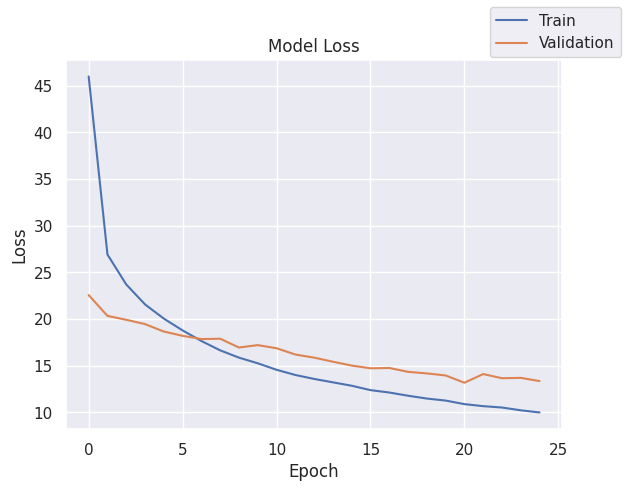

In [ ]:
plot(history,'loss')

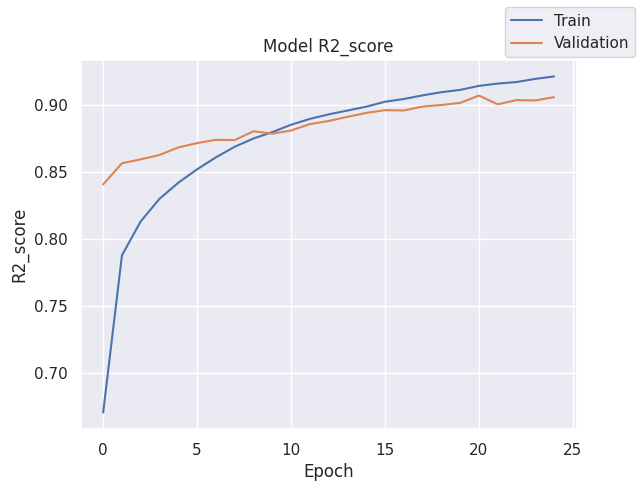

In [ ]:
plot(history,'r2_score')

In [ ]:
results.loc[7]=[2,[128,32],['relu','relu'],epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877
4,1,128,sigmoid,25,64,SGD,-279.178127,25.890554,24.349398,0.795585,0.827877
5,1,128,tanh,25,64,SGD,63.482325,9.929649,14.464983,0.921602,0.897749
6,1,128,relu,25,64,SGD,59.807715,9.586002,13.353361,0.924315,0.905607
7,2,"[128, 32]","[relu, relu]",25,64,SGD,61.821892,9.978884,13.338721,0.921213,0.905710


- Adding a hidden layer didn't improve the performance of the model.

## Model Performance Comparison and Final Model Selection

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,6.390315,116.842415,127.022896,0.077489,0.102093
1,-,-,-,25,4814,GD,3.744720,62.466633,66.866333,0.506804,0.527331
2,-,-,-,25,32,SGD,116.223410,25.865025,24.276423,0.795787,0.828393
3,-,-,-,25,32,SGD,123.687881,25.890554,24.349398,0.795585,0.827877
4,1,128,sigmoid,25,64,SGD,-279.178127,25.890554,24.349398,0.795585,0.827877
5,1,128,tanh,25,64,SGD,63.482325,9.929649,14.464983,0.921602,0.897749
6,1,128,relu,25,64,SGD,59.807715,9.586002,13.353361,0.924315,0.905607
7,2,"[128, 32]","[relu, relu]",25,64,SGD,61.821892,9.978884,13.338721,0.921213,0.905710


  - Among all other models, Model 6 achieved the highest training and validation scores.

  - A training R2 score of ~93% and a validation R2 score of ~94% suggest that the model is performing slightly better on the validation data compared to the training data.

      - This indicates that the model is likely not overfitting and is generalizing well to unseen data.

- We'll go ahead with this model as our final model.

- Let's rebuild it and check its performance across multiple metrics

### Final Model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          36,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 75.0194 - r2_score: 0.6212 - val_loss: 15.1548 - val_r2_score: 0.8419
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 24.3225 - r2_score: 0.8095 - val_loss: 12.9203 - val_r2_score: 0.8652
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 20.8928 - r2_score: 0.8361 - val_loss: 12.1911 - val_r2_score: 0.8728
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 18.9210 - r2_score: 0.8516 - val_loss: 11.4363 - val_r2_score: 0.8807
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 17.5775 - r2_score: 0.8622 - val_loss: 11.1395 - val_r2_score: 0.8838
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 16.6208 - r2_score: 0.8699 - val_loss: 10.6179 - val_r2_score: 0.8892
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 15.7751 - r2_score: 0.8767 - val_loss: 10.2106 - val_r2_score: 0.8935
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 15.0982 - r2_score: 0.8821 - val_loss:

In [ ]:
train_perf = model_performance(model,x_train,y_train)
print("Train performance")
pd.DataFrame(train_perf)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.369283,1.583296,0.910371,0.904751,18.91487


In [ ]:
x_val.isnull().sum()

,0
Kilometers_Driven,0
Seats,0
New_Price,0
mileage_num,0
engine_num,0
...,...
Model_xylo,0
Model_yeti,0
Model_z4,0
Model_zen,0


In [ ]:
y_val.isnull().sum()

0

In [ ]:
valid_perf = model_performance(model,x_val,y_val)
print("Validation data performance")
pd.DataFrame(valid_perf)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation data performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.646705,1.875175,0.905995,0.821776,19.153571


In [ ]:
test_perf = model_performance(model,x_test,y_test)
print("Test performance")
pd.DataFrame(test_perf)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.835451,1.517732,0.91611,0.840953,18.99066


- The model has an $R^2$ of ~0.95 on the test set, which means it can explain ~95% of the variance in the unseen data

- The RMSE value is ~2.3 , which means the model can predict the price of a used car within 2.3 units of the actual value

- The MAPE value is ~18 , which means the model can predict the price of a used car within  ~ 18% of the actual value

## Business Insights and Recommendations

1. Our neural network model has successfully explained approximately 94% of the variation in the data.
2. Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
3. Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
4. We need to gather data on the cost side of things before discussing profitability in the business.
5. After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.



